<a href="https://colab.research.google.com/github/jocker1854/Machine-Learning-Projects/blob/main/Project_1_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading dataset from kaggle

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("camnugent/california-housing-prices")

print("Path to dataset files:", path)

100%|██████████| 400k/400k [00:00<00:00, 1.04MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/camnugent/california-housing-prices/versions/1


# Importing necessary packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv(path + "/housing.csv")

## EDA

In [ ]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

## Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
train_data = X_train.join(y_train)
train_data.shape

(16346, 10)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>],
       [<Axes: title={'center': 'NEAR BAY'}>,
        <Axes: title={'center': 'NEAR OCEAN'}>,
        <Axes: title={'center': 'bedroom_ratio'}>,
        <Axes: title={'center': 'household_rooms'}>]], dtype=object)

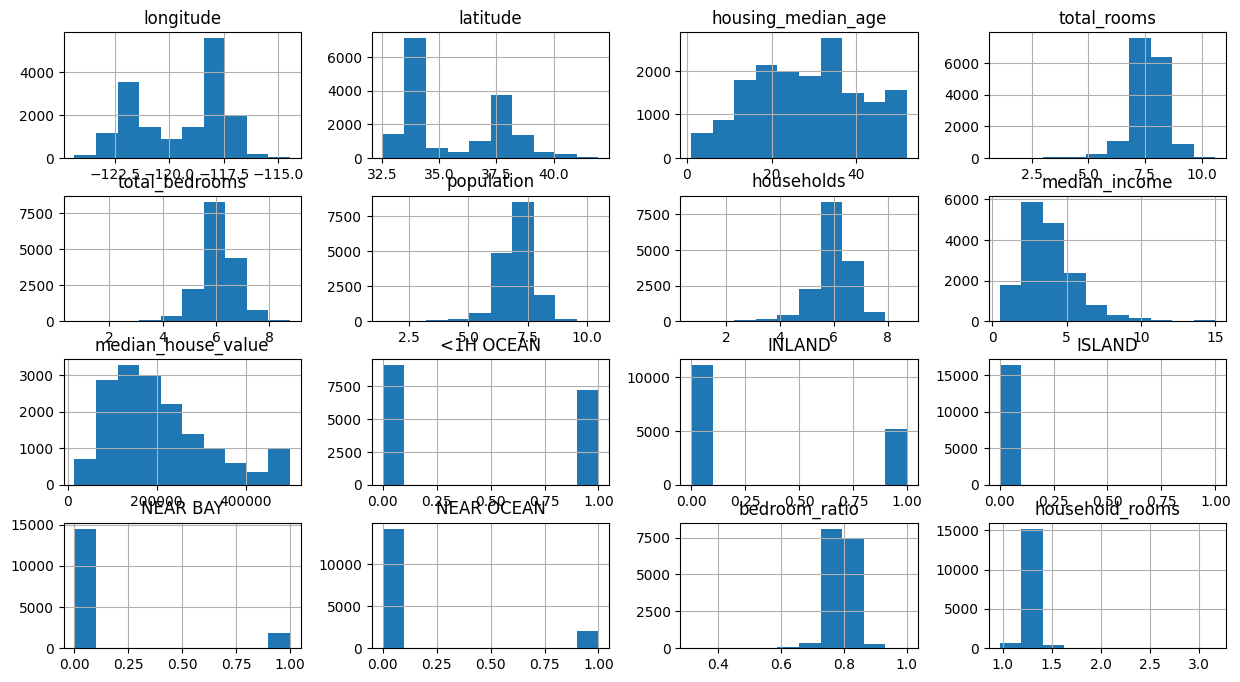

In [ ]:
train_data.hist(figsize=(15, 8))

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='YlGnBu')

In [ ]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

In [ ]:
train_data.hist(figsize=(15, 8))

In [ ]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity, dtype=int)).drop(['ocean_proximity'], axis=1)

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='YlGnBu')

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=train_data, x='latitude',y='longitude', hue='median_house_value', palette='coolwarm')

In [ ]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='YlGnBu')

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
16358,-121.29,38.00,12.0,8.303752,6.980076,8.143517,6.849066,1.9698,112300.0,0,1,0,0,0,0.840593,1.212392
2865,-118.88,35.34,20.0,7.209340,5.545177,6.637258,5.537334,2.1111,105300.0,0,1,0,0,0,0.769166,1.301951
3262,-122.90,39.17,45.0,7.181592,5.627621,6.476972,5.451038,2.5750,73600.0,0,1,0,0,0,0.783617,1.317472
19594,-120.86,37.60,25.0,7.072422,5.332719,6.565265,5.370638,4.5625,133600.0,0,1,0,0,0,0.754016,1.316868
13841,-117.31,34.53,26.0,7.740664,6.208590,7.138867,6.091310,2.6125,79900.0,0,1,0,0,0,0.802075,1.270772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17241,-119.68,34.43,49.0,7.487734,5.958425,7.145196,5.942799,3.5208,251200.0,1,0,0,0,0,0.795758,1.259967
5248,-118.43,34.08,46.0,6.658011,4.510860,5.476464,4.543295,15.0001,500001.0,1,0,0,0,0,0.677509,1.465459
3969,-118.58,34.20,35.0,7.188413,5.433722,6.629363,5.379897,4.2330,221300.0,1,0,0,0,0,0.755900,1.336162
547,-122.27,37.77,52.0,7.444833,6.177944,6.745236,6.126869,2.7115,220800.0,0,0,0,1,0,0.829830,1.215112


In [ ]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity, dtype=int)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [ ]:
train_data.shape, test_data.shape

((16346, 16), (4087, 16))

In [ ]:
train_data.columns

In [ ]:
test_data

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

X_train = train_data.drop(['median_house_value'], axis=1)
y_train = train_data['median_house_value']

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()
reg.fit(X_train_s, y_train)

LinearRegression()

In [ ]:
X_test = test_data.drop(['median_house_value'], axis=1)
y_test = test_data['median_house_value']

X_test_s = scaler.transform(X_test)

In [ ]:
train_data.columns

In [ ]:
test_data.columns

In [ ]:
reg.score(X_test_s, y_test)

0.6653823276639903

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [ ]:
forest.score(X_test_s, y_test)

0.8195059564319009

In [ ]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {'n_estimators': [100, 200, 300],
              'min_samples_split': [2, 4],
              'max_depth': [None, 4, 8],
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train_s, y_train)

In [ ]:
best_forest = grid_search.best_estimator_

In [ ]:
best_forest.score(X_test_s, y_test)